## Parker Wind Solution by Phase Plane Analysis

In [1]:
import numpy as np
from scipy.optimize import root
from scipy.optimize import approx_fprime
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab

In [2]:
# analytic solution
def parkerc(r,v):
    return 0.5*v*v - np.log(v) - 2.0*np.log(r) -2/r

r=np.linspace(0,3, 1000)
v=np.linspace(0,3, 1000)
c=[]
for i in range(len(r)):
    for j in range(len(v)):
        c.append(parkerc(r[j], v[i]))
c=np.array(c)
Za=c.reshape(len(v), len(r))
Xa, Ya=pylab.meshgrid(r, v) 

/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
def f0(x):
    return 0.5*(x[1] - 1/x[1])
def f1(x):
    return 1/x[0] - 1/x[0]**2

crit=1.e-10
def func(x,t,sign):
    if x[0]<crit or x[1] < crit:
        return np.array([0.0,0.0]) #stopping near the origin
    else:
        return np.array([sign*f0(x),sign*f1(x)])

In [4]:
# finding the singular point
sol1 = root(func, [0.5, 0.5],(1,1),method='broyden1')

In [5]:
# compute Jacobian
eps = np.sqrt(np.finfo(float).eps)
epsx = [eps, np.sqrt(200) * eps]

y0=approx_fprime(sol1.x, f0,epsx)
y1=approx_fprime(sol1.x, f1,epsx)
jac=np.array([y0,y1]).T
lam,eigv=eig(jac)

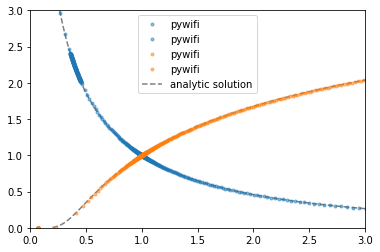

In [17]:
# phase plane analysis
delta=0.01
t=np.linspace(0,10,300)
xsing=sol1.x
fig=plt.figure()
plt.contour(Xa, Ya, Za,[-1.5],colors='gray', linestyles='dashed',label="analytic solution")
for i,lameig in enumerate(lam):
    sign=-np.sign(lameig)
    for k,j in enumerate([-1,1]):
        dv=j*eigv[i]*delta
        X,Y=odeint(func,xsing+dv,t,args=(sign,)).T
        plt.plot(X,Y,".",color="C"+str(i),alpha=0.5,label="pywifi")
    #plt.plot(X[0:3],Y[0:3],"+",color="C"+str(k),label=str(k))
plt.plot([-1],[1],color="gray",label="analytic solution",ls="dashed")
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.savefig("parker.png")